In [13]:
from typing import List
from operator import attrgetter

import gym
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib as mpl

mpl.rcParams["figure.figsize"] = (20, 10)

In [26]:
%load_ext autoreload
%autoreload 2

from rl_learning import SimplePolicy, MonetCarloSimulation, QTableDict, QLearningSimulation, EpsilonGreedyPolicy, Sarsa
from notebook_util import plot_v_function, evaluate_td_learning, plot_stat

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Часть первая

## Простая стратегия

In [15]:
policy = SimplePolicy()
simulator = MonetCarloSimulation(gym.make("Blackjack-v0"), policy)

In [16]:
rewards = simulator.simulate(10_000)

100%|██████████| 10000/10000 [00:01<00:00, 9496.65it/s]


In [17]:
rows = []
for state, expected_reward in rewards.items():
    rows.append(state + (expected_reward,))

stat = pd.DataFrame(rows, columns=["player_sum", "dealer_open_card", "usable_ace", "reward"])
del rows

In [18]:
usable_ace_stat = stat[stat["usable_ace"] == True]
not_usable_ace_stat = stat[stat["usable_ace"] == False]

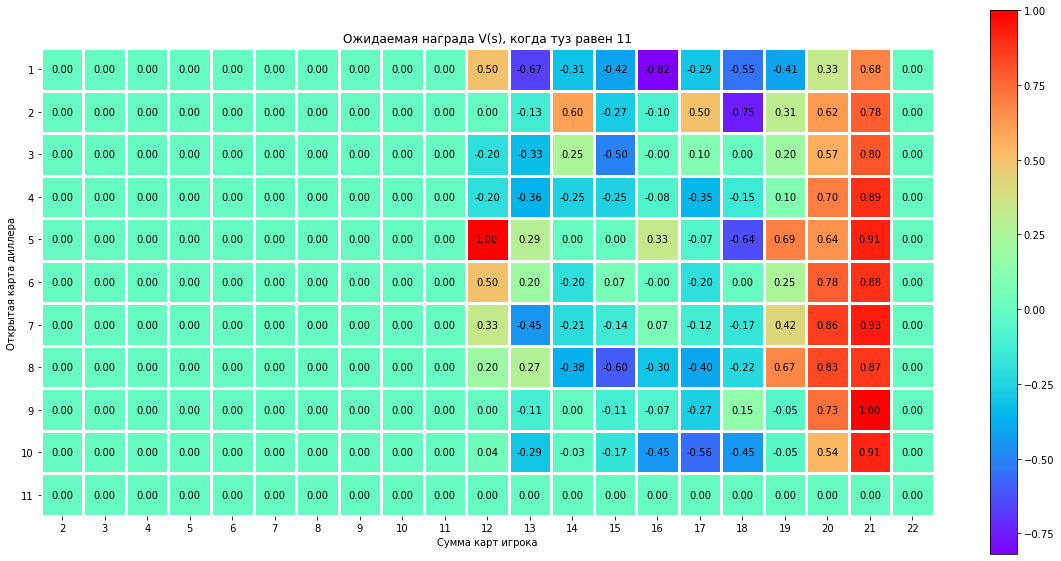

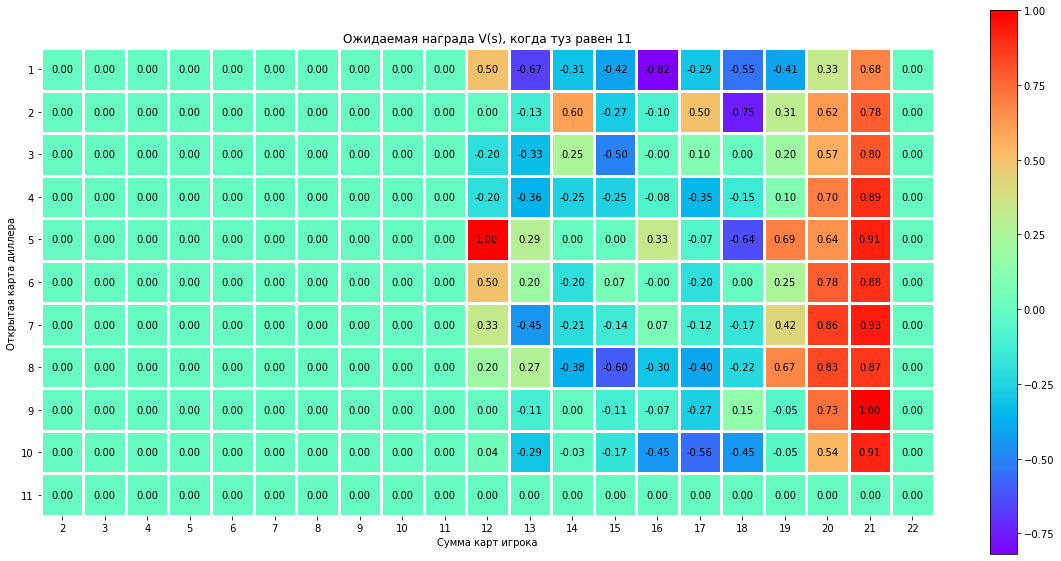

In [19]:
plot_v_function(usable_ace_stat, "Ожидаемая награда V(s), когда туз равен 11")

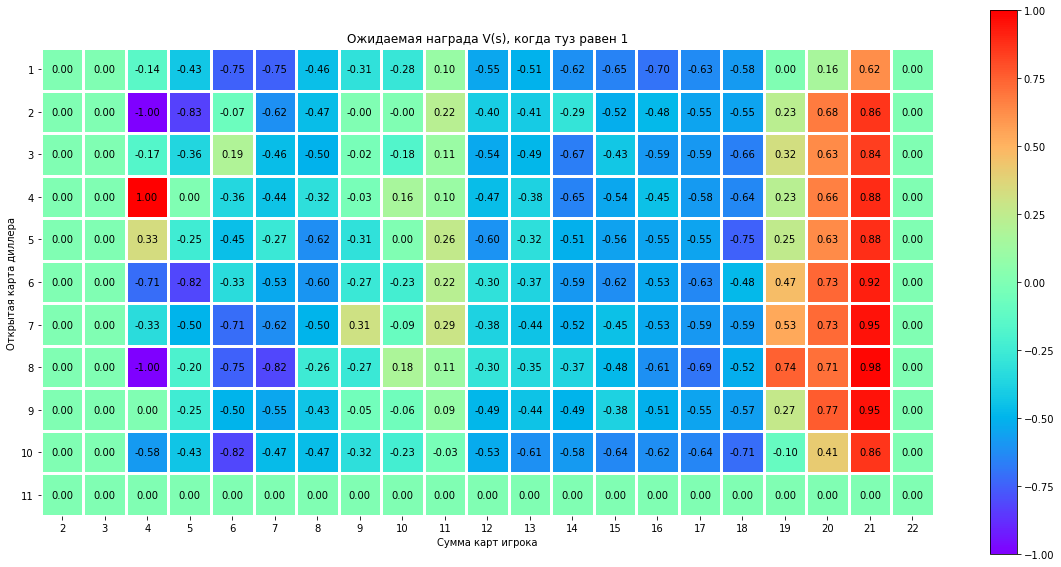

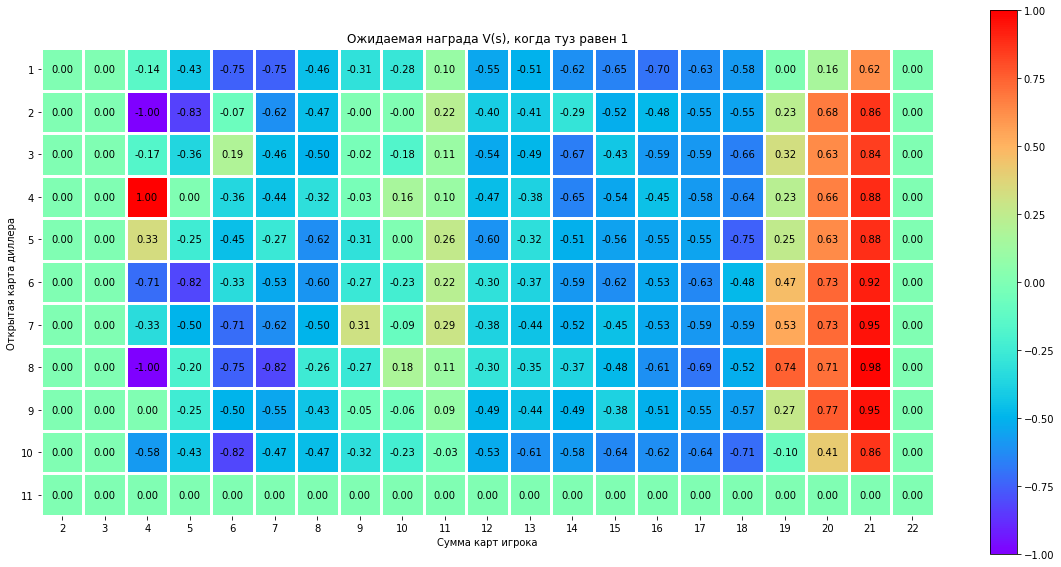

In [20]:
plot_v_function(not_usable_ace_stat, "Ожидаемая награда V(s), когда туз равен 1")

## Q-обучение

In [30]:
gama_values = np.linspace(0.5, 1, 4)
alpha_values = np.linspace(1e-2, 0.5, 3)
num_train_episodes = 10_000
num_test_episodes = 20
epsilon = 0.01

In [31]:
train_stat, test_stat, q_function = evaluate_td_learning(alpha_values, gama_values, epsilon=epsilon, num_train_episodes=num_train_episodes, num_test_episodes=num_test_episodes)

 21%|██        | 2068/10000 [00:05<00:19, 410.59it/s]

(<Figure size 1440x720 with 2 Axes>,
 <Figure size 1440x720 with 1 Axes>,
 <Figure size 1440x720 with 2 Axes>)

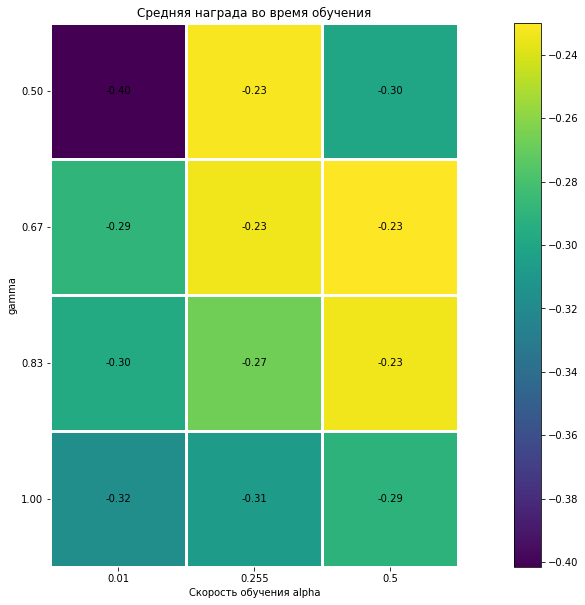

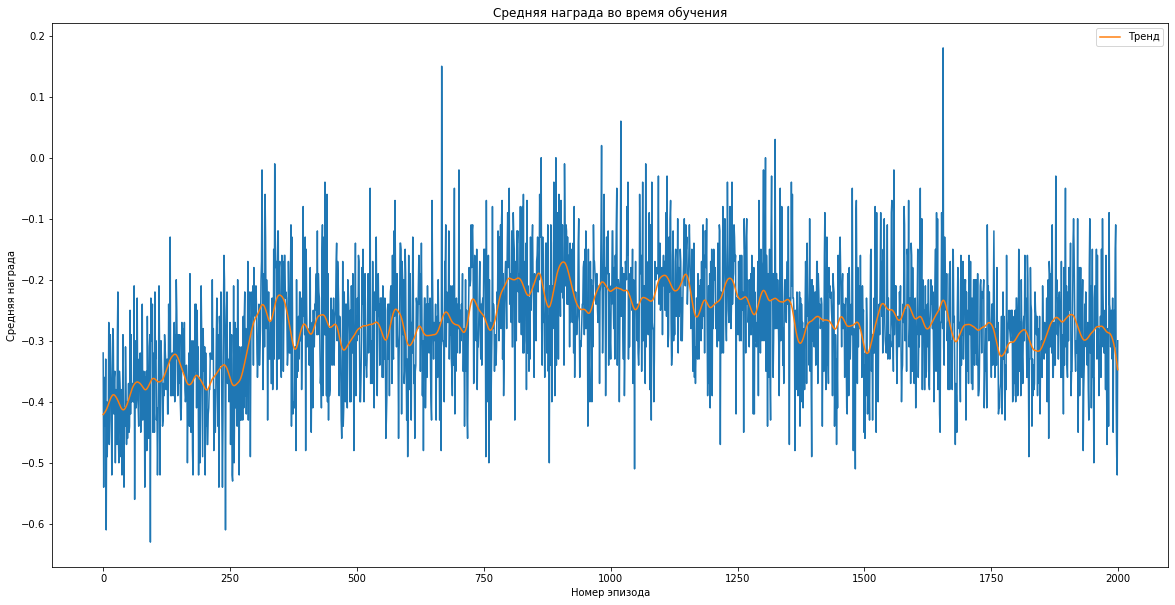

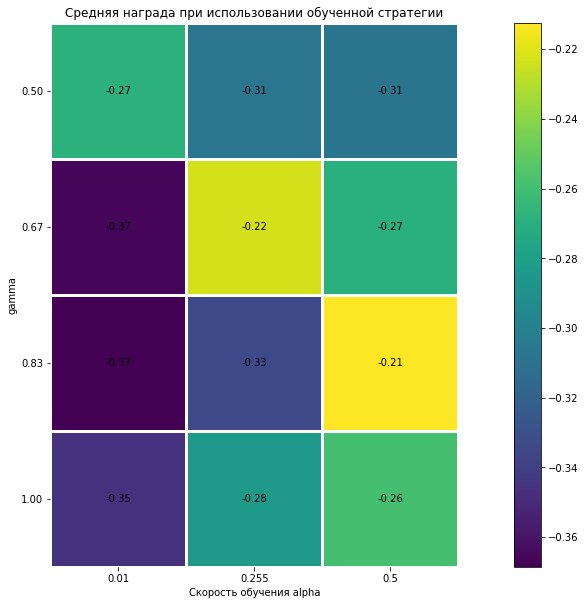

In [29]:
plot_stat(alpha_values, gama_values, train_stat, test_stat)

# Sarsa

In [27]:
train_stat, test_stat, q_function = evaluate_td_learning(alpha_values, gama_values, epsilon=epsilon, num_train_episodes=num_train_episodes, num_test_episodes=num_test_episodes, learning_cls=Sarsa)

NameError: name 'generate_params_params' is not defined

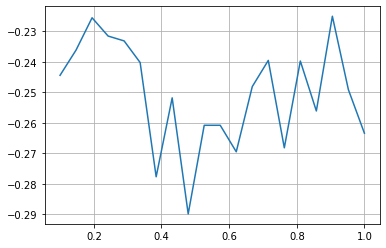

In [ ]:
plt.plot(values[:, 0], values[:, 1])
plt.grid(True)

<AxesSubplot:>

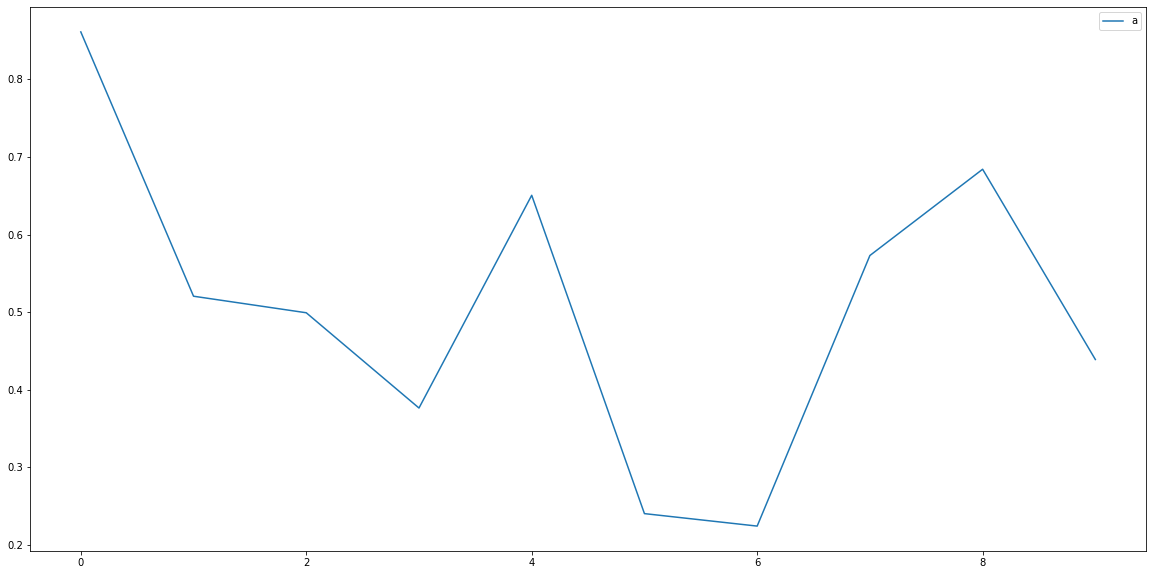

In [ ]:
pd.DataFrame({"a": np.random.rand(10)}).ewm(com=0.5).mean().plot()

In [ ]:
data = np.random.rand(200)

In [ ]:
cycle, trend = sm.tsa.filters.hpfilter(data)

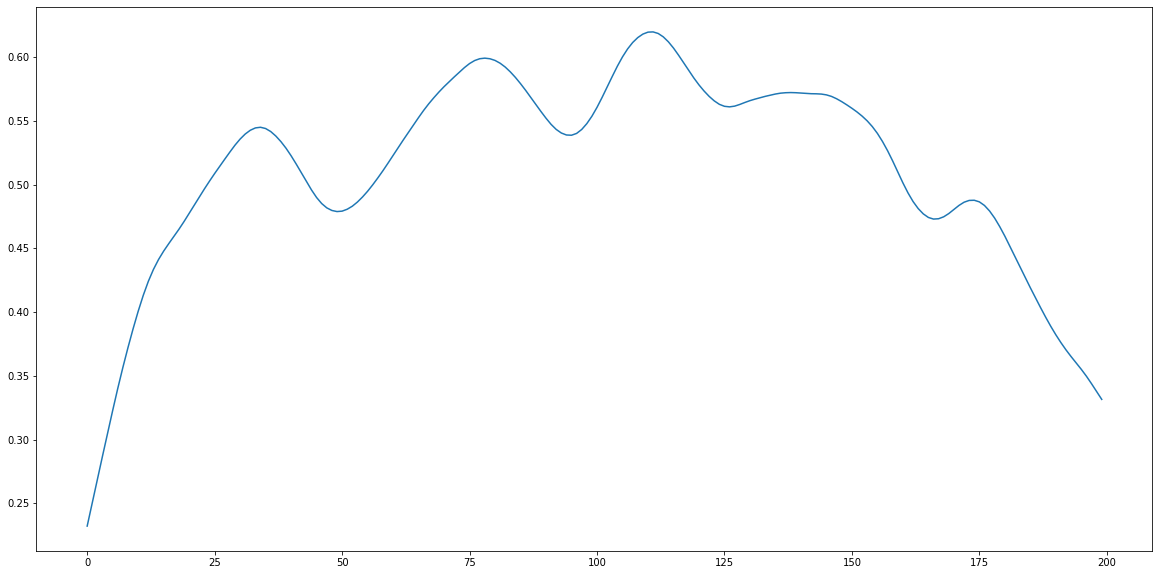

In [ ]:
plt.plot(list(range(len(trend))), trend)

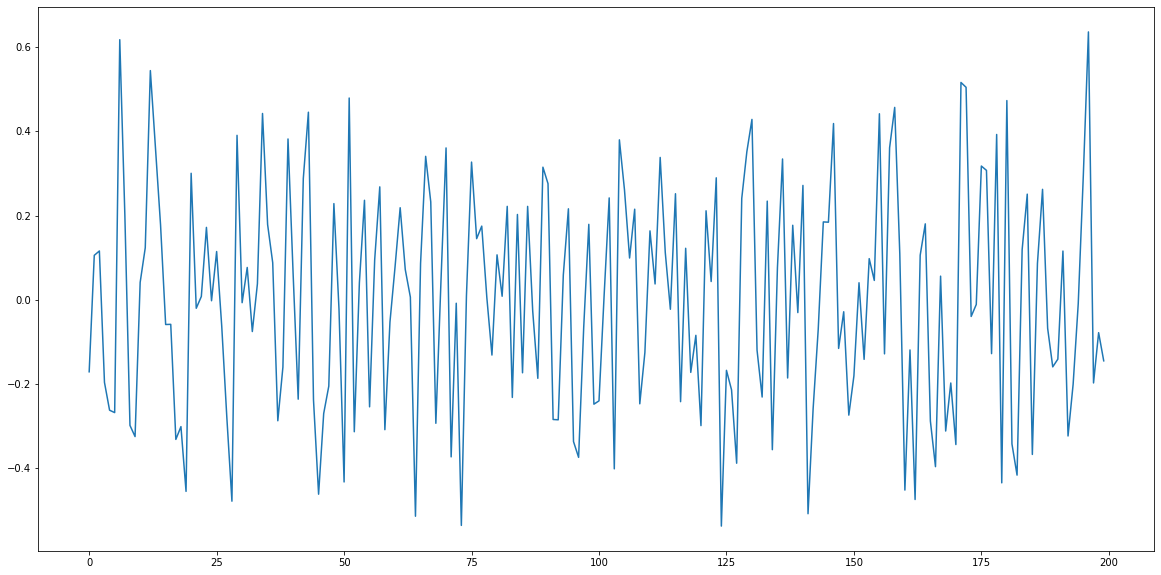

In [ ]:
plt.plot(list(range(len(trend))), cycle)